## Welcome.
____
### This tutorial provides each step to generate a customized CPMG signal and convert the data into the image representation (Fig.2 in the main text).
____

*   Note 1: To run this notebook, first click "Open in playgound" tab above. You may need "Chrome" browser and "Gmail account". Then in each cell, press 'Shift + Enter'
*   Note 2: It does not store anything in your device and does not need any packages or programs from your device.



In [ ]:
import numpy as np
import glob
import sys
from imports.utils import *
init_notebook_mode(connected=True)
import time
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [ ]:
N_PULSE_32 = 32
N_PULSE_64 = 64
N_PULSE_96 = 96
N_PULSE_256 = 256
MAGNETIC_FIELD = 403.553            # Unit: Gauss
GYRO_MAGNETIC_RATIO = 1.0705*1000               # Unit: Herts
WL_VALUE = MAGNETIC_FIELD*GYRO_MAGNETIC_RATIO*2*np.pi

# time_data: a time range of simularated CPMG data. (unit: us, resolution: 4ns)
time_data = np.arange(0, 60, 0.004)

In [ ]:
# total_indices: a dictionary file that contains target periods (value: time indexing number) with a corresponding target period (key: A (Hz)).
total_indices = np.load('../tutorial_data/total_indices_v4_full.npy', allow_pickle=True).item()

# AB_lists_dic: a dictionary file that contains nuclear spins (value: (A,B) pairs (Hz)) with a corresponding target period (key: A (Hz)).
AB_lists_dic = np.load('../tutorial_data/AB_target_dic_v4_s0.npy', allow_pickle=True).item()
for i in range(1, 16):
    temp = np.load('../tutorial_data/AB_target_dic_v4_s{}.npy'.format(i), allow_pickle=True).item()
    AB_lists_dic.update(temp)

___
#### N32

##### Now, we're ready to generate simulated CPMG data. Let's set a list of spins as follows. (Unit: A(kHz), B(kHz))


*   Spin1 = [5, 32]
*   Spin2 = [48, 53]
*   Spin3 = [10, 10]
*   Spin4 = [-18, 18]
*   Spin5 = [-23, 15]
*   Spin6 = [-35, 28]


In [ ]:
total_spins = np.array([
                        [5, 32],
                        [41, 53],
                        [10, 11],
                        [-17, 18],
                        [-23, 15],
                        [-35, 28],
])

In [ ]:
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_32)
Px = (1+M_values) / 2

Text(0, 0.5, 'Px')

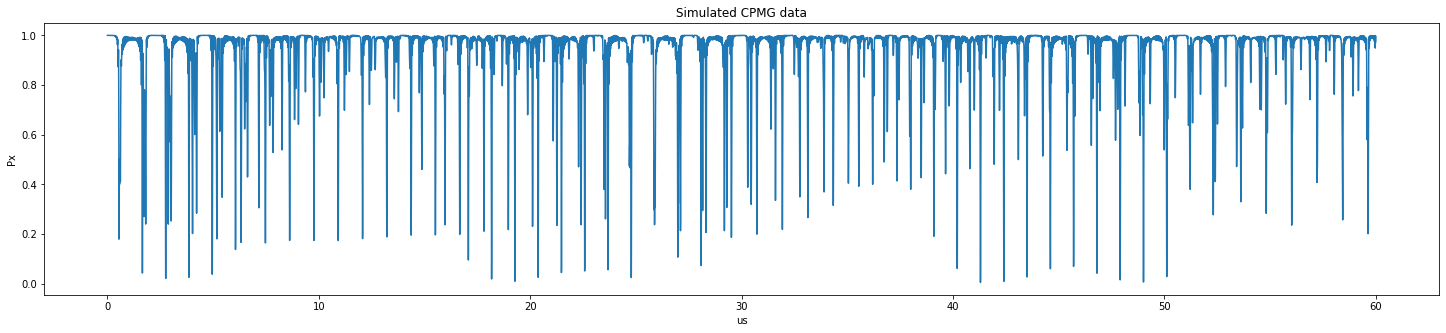

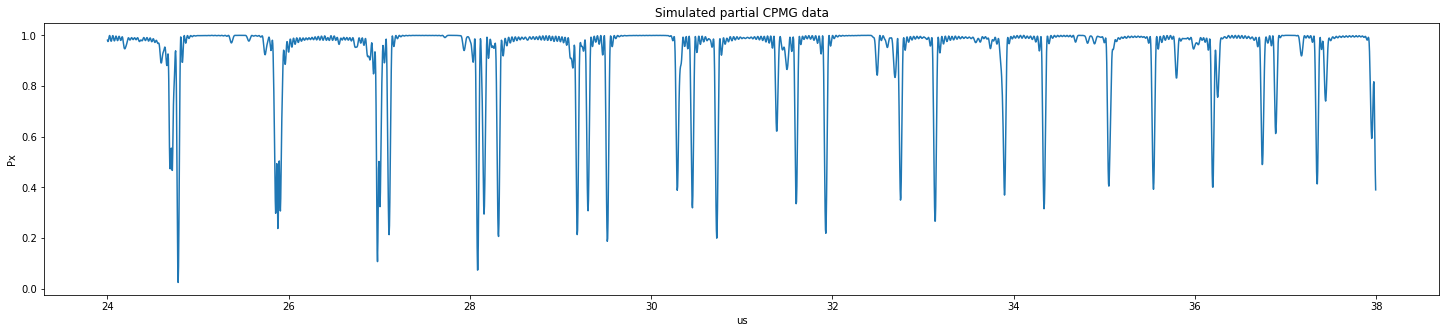

In [ ]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

##### Now, let's see the data through the image representation.

In [ ]:
# A_index: a parameter to determine a target period (TPk) in the main text. For example, if you set A_index = 0, then you see the data with a target period of the Larmor frequency.
A_index = 0
# image width: a parameter to determine a width of an image.
image_width = 120
# model_index: a parameter to slice the CPMG data with a target period.
model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)

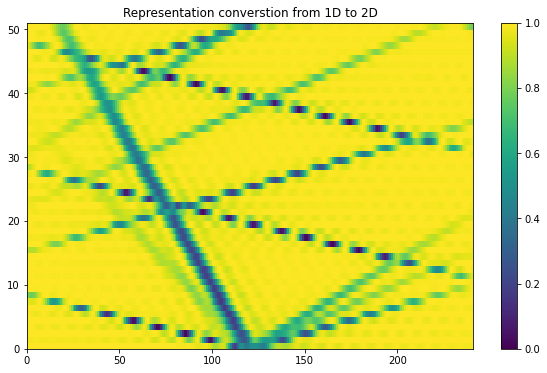

In [ ]:
plt.figure(facecolor='w', figsize=(10,6))
plt.pcolor(Px[model_index], vmin=0, vmax=1)
plt.title('Representation converstion from 1D to 2D')
plt.colorbar()

_____
*   It shows various lines where each line represents one of spins in the list above.
*   The image representation provides a much clearer view to distinguish each spin by a different slope.

_____
### Now, let's see the data with different A_index values
: Each value of A_index will be set to a target period of a spin in the spin list.
--> So, each image would show the spin with a vertical slope.



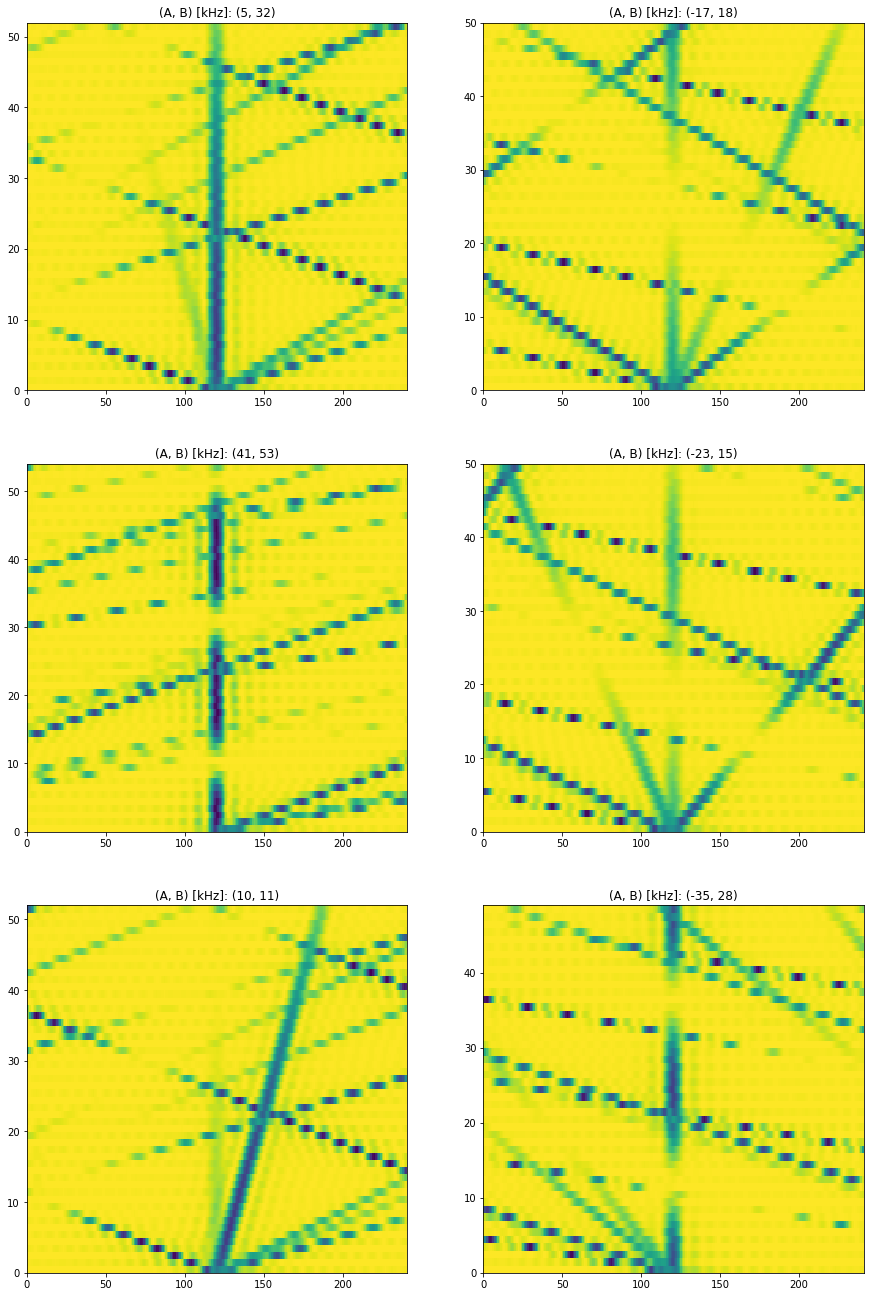

In [ ]:
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')

Let's see how different features the same list of spins show depending on the number of pulses(N) in CPMG signal. <br>
Below are the cases in N64, N96, N256.
___
#### N64

In [ ]:
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_64)
Px = (1+M_values) / 2

Text(0, 0.5, 'Px')

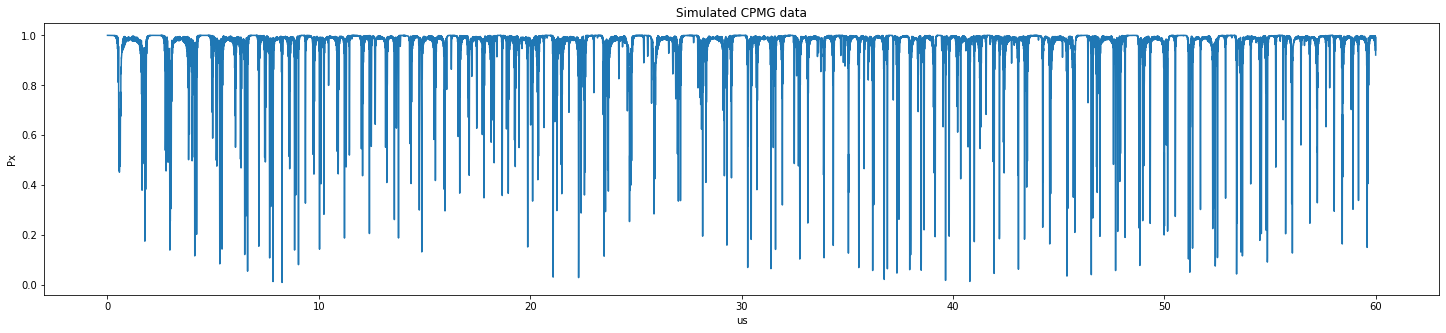

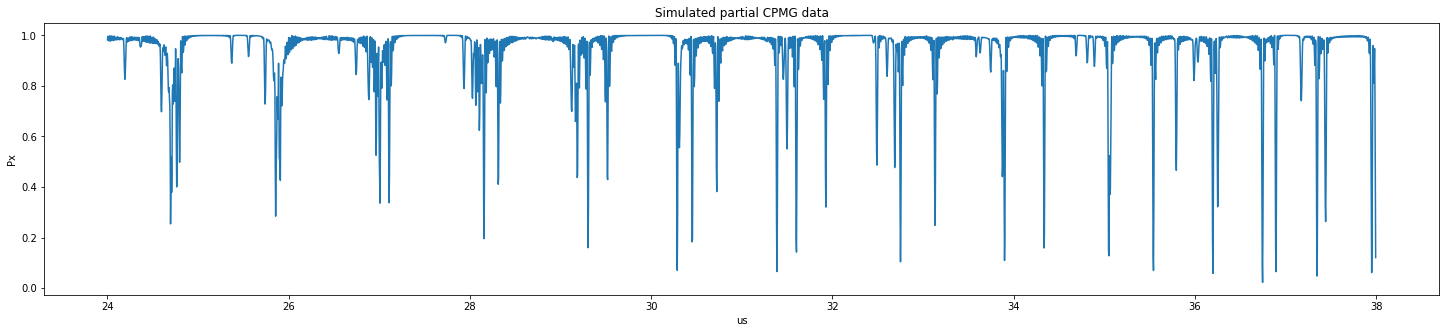

In [ ]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

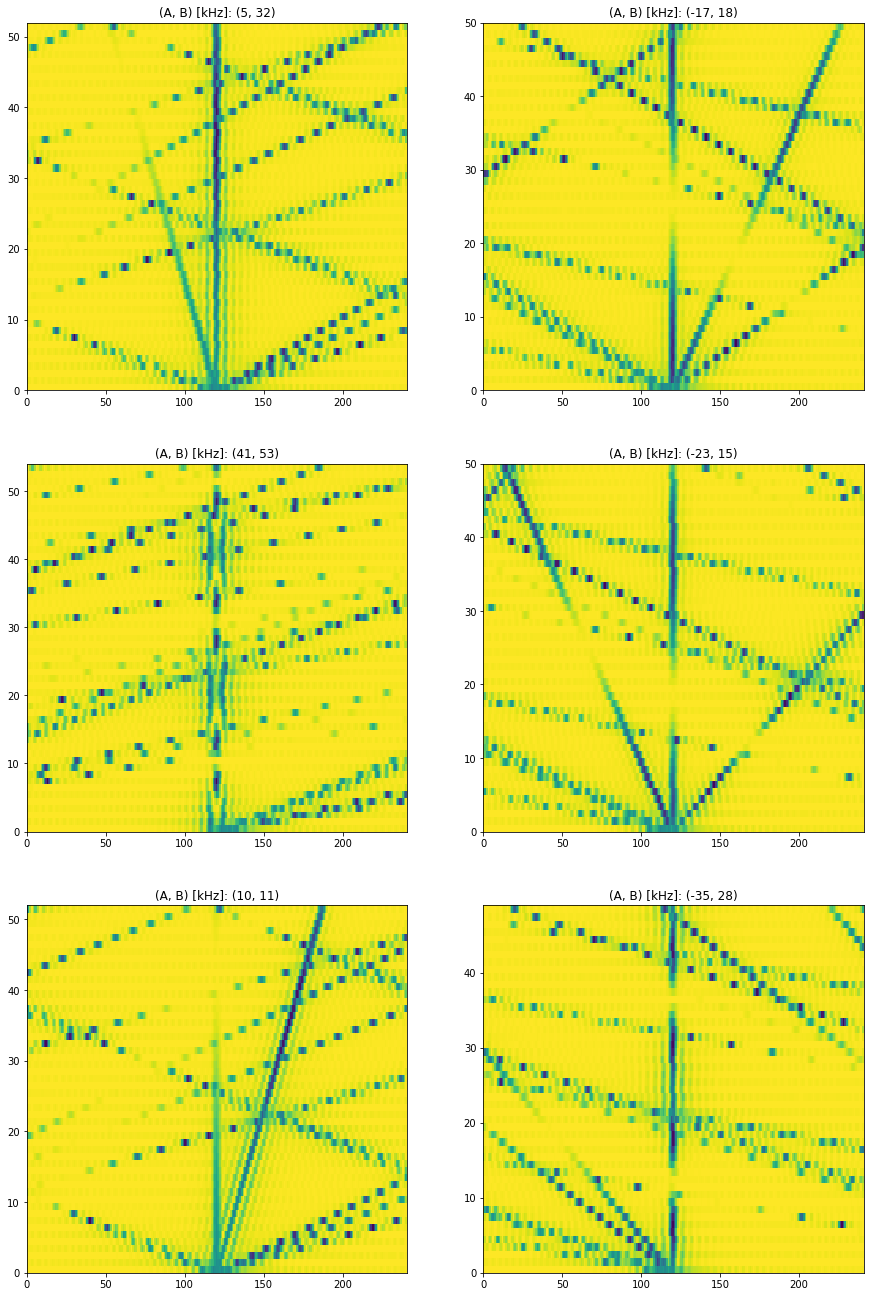

In [ ]:
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')

___
#### N96

In [ ]:
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_96)
Px = (1+M_values) / 2

Text(0, 0.5, 'Px')

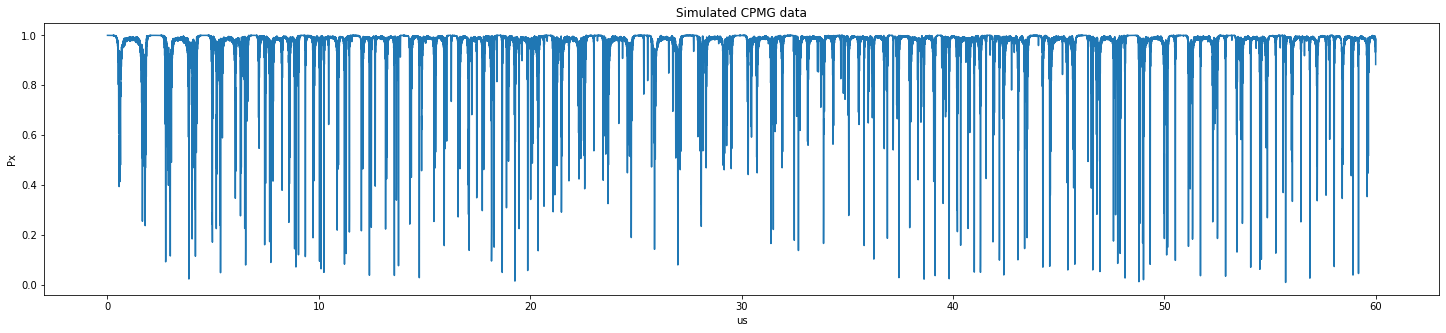

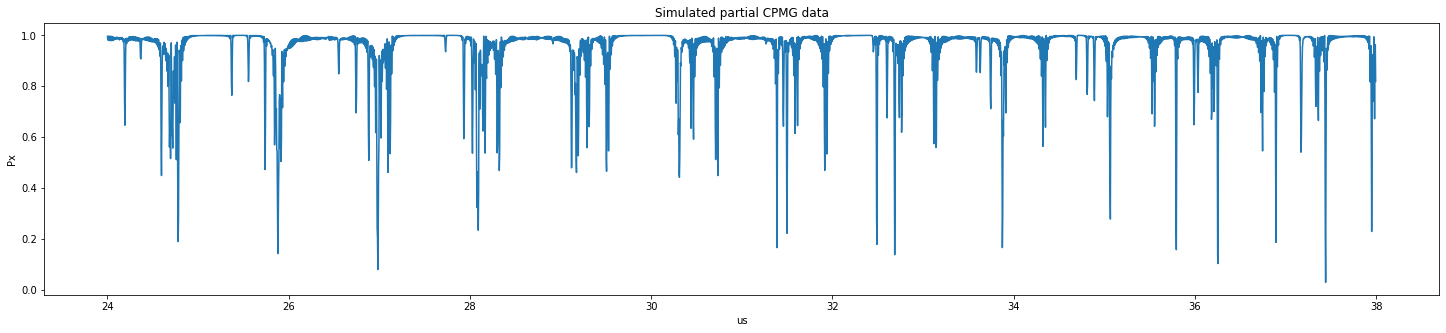

In [ ]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

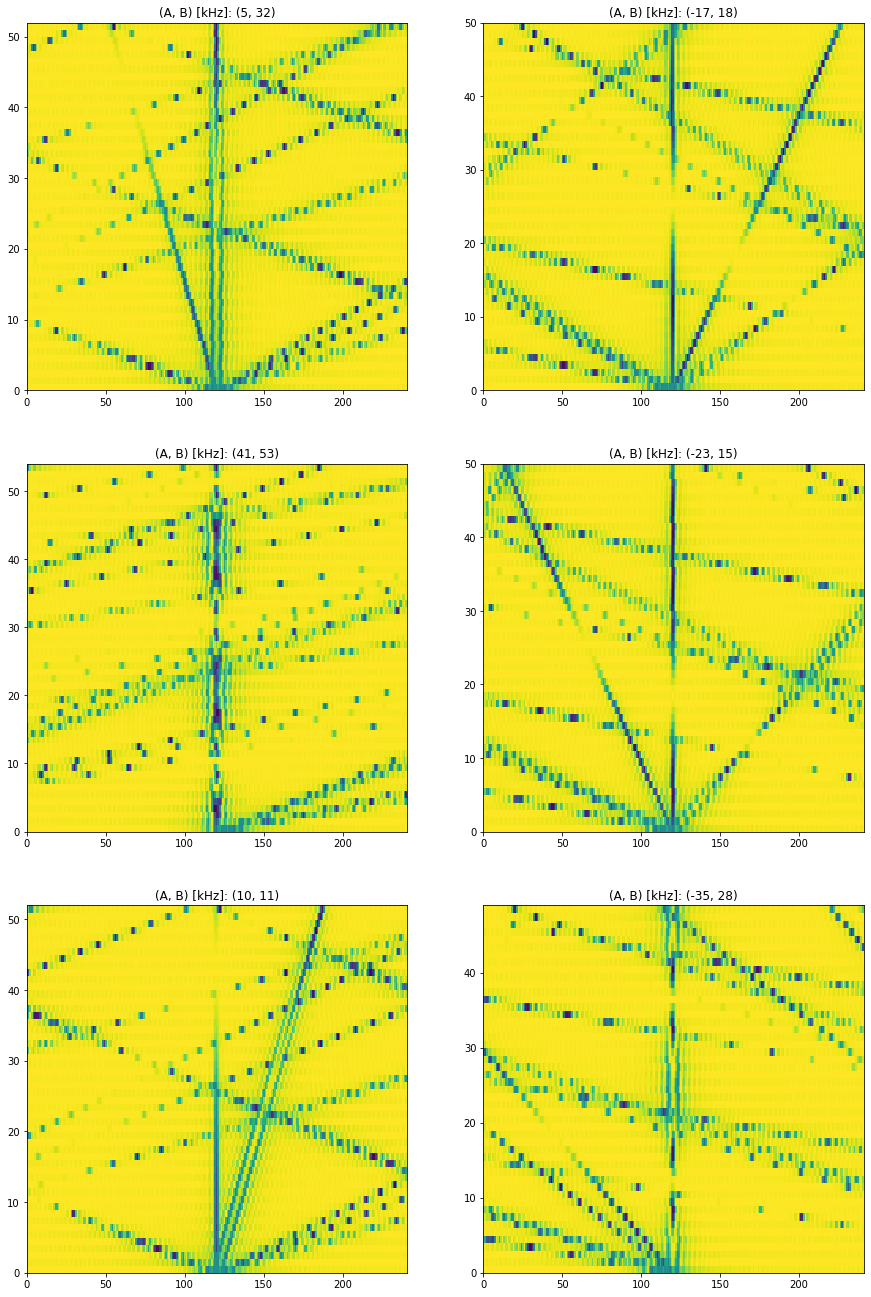

In [ ]:
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')

___
#### N256

Text(0, 0.5, 'Px')

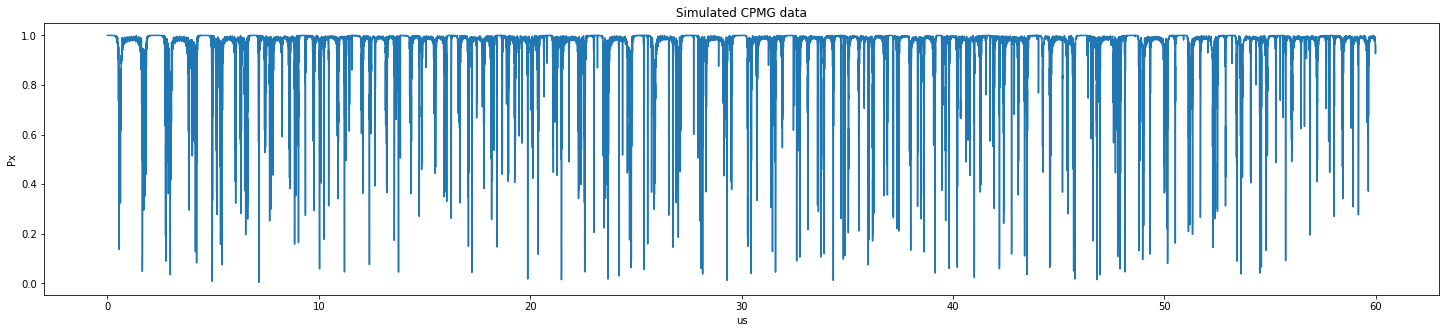

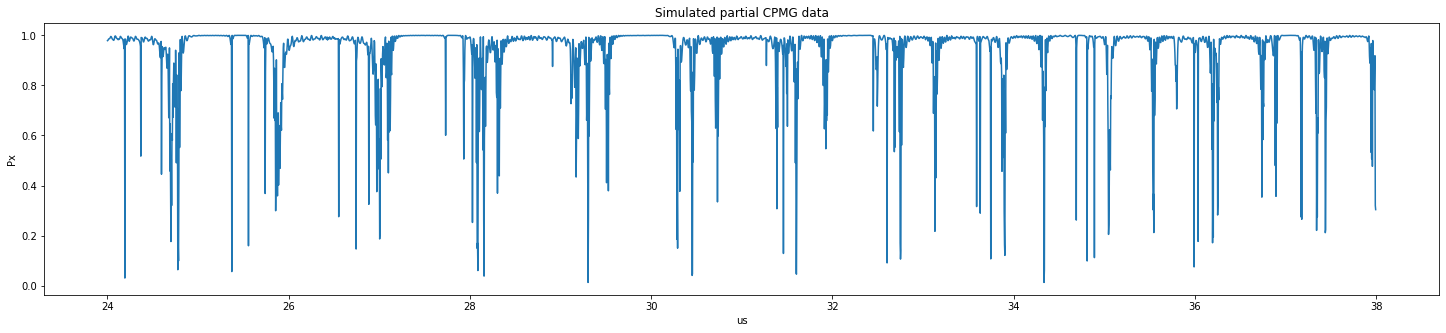

In [ ]:
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_256)
Px = (1+M_values) / 2

plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

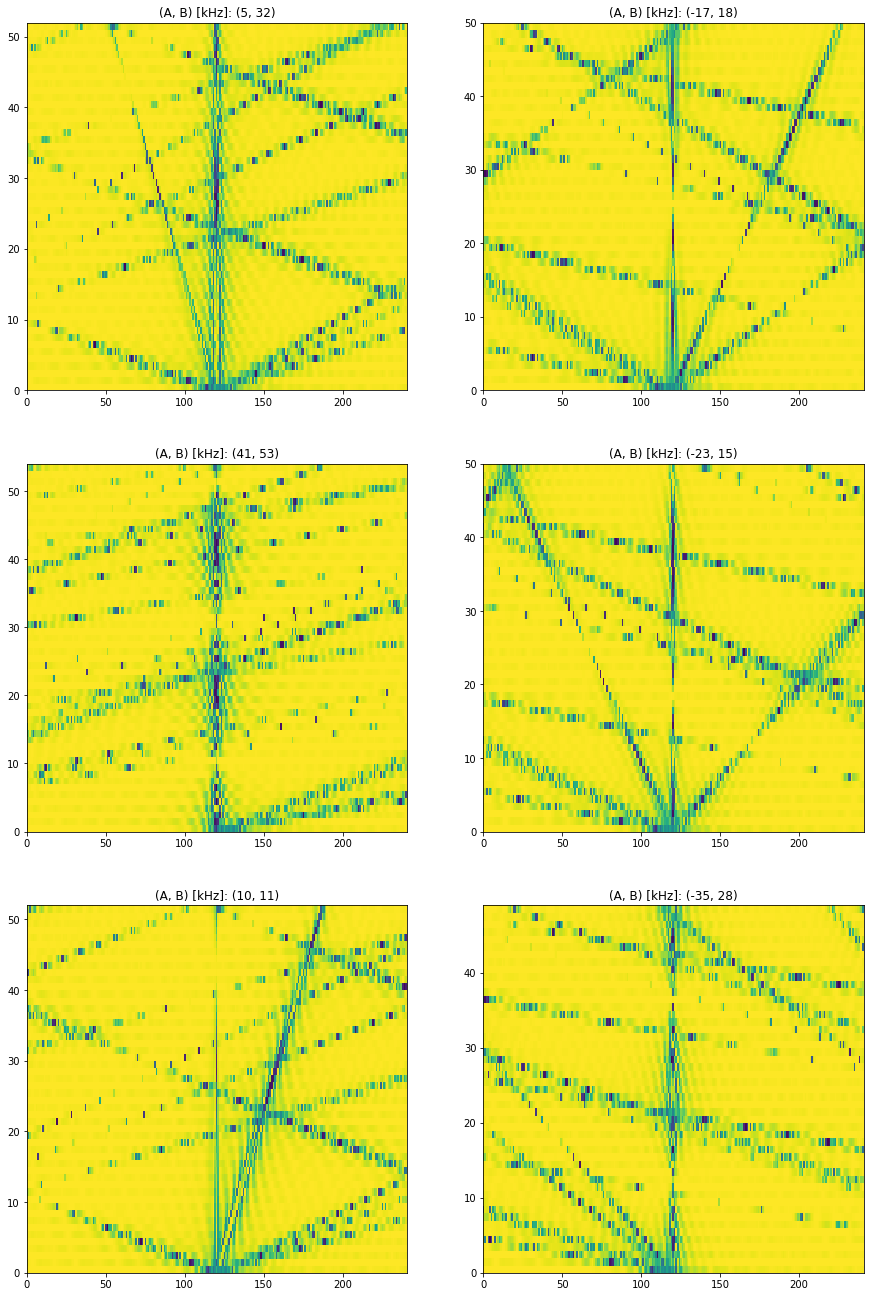

In [ ]:
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')

____
### Summary<br>

1.   The data representation allows one to distinguish each individual spins by a slope and features of each line.
2.   As N increase, it shows more complicated features and frindge patterns near a cetral dip.
